In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from statistics import median, mean
from multiprocessing import Process
import requests
from multiprocessing.pool import ThreadPool as Pool
import timeit

## Practice using python statistics on Dataframe Rows

initializing dataframe

In [125]:
NumColumns = 100
NumRows = 1000

df = pd.DataFrame(np.random.randn(NumRows,NumColumns)) #row, columns

Simple statistical data on data frame

In [126]:
print("Median: " + str(median(df[0])))
print("Mean:   " + str(mean(df[0])))
print("Max:    " + str(max(df[0])))
print("Min:    " + str(min(df[0])))

#plt.table(cellText=df.values, colLabels=df.columns, loc='center')
#df.describe()

Median: -0.03791978445224502
Mean:   -0.03582999951536705
Max:    3.435540237891692
Min:    -2.937065553274843


##  Defining a function that gets maximum from all medians of rows in a 'chunk'

In [70]:
def chunkMax(chunk) -> float:
    #Initializing Max to first element 
    chunkMax = median(chunk.iloc[0])
    
    for i in range(1, len(chunk)) :
        med = median(chunk.iloc[i])
        if (chunkMax < med):
            chunkMax = med
    return chunkMax

### Testing the function

Here I am comparing my function's found maximum, to all of the rows of a test dataframe, to see if the maximum matches

In [71]:
testdf = pd.DataFrame(np.random.randn(4,5))

testdfMax = chunkMax(testdf)
print("my functions max for all rows: ")
print(testdfMax)
print("\n")
print("median for each row: ")
print(median(testdf.iloc[0]))
print(median(testdf.iloc[1]))
print(median(testdf.iloc[2]))
print(median(testdf.iloc[3]))

my functions max for all rows: 
0.31455736867006584


median for each row: 
-0.9182291545459442
0.31455736867006584
0.16262573409742037
-0.16243389418893264


## Practice splitting a python dataframe

This is the best way I found to split a dataframe by row. (i.e. I didn't find any inbuilt functions)

In [73]:
#Splitting the dataframe into 2 parts
df1 = df.iloc[:int(NumRows/2),:]
df2 = df.iloc[int(NumRows/2):,:]

In [74]:
df1Max = chunkMax(df1)
df2Max = chunkMax(df2)
print(df1Max)
print(df2Max)

0.3111812586296966
0.3635871539469633


## Function to split dataframe into certain number of chunks

Is there a better way to do this? Perhaps a built in function in multiprocessing to split apart a dataframe / list automatically?

In [88]:
def splitdf(df, numChunks):
    rowsPerChunk = int(len(df) / numChunks)
    
    chunkArray = []
    #iterate through the number of chunks, assign those chunks indices
    for i in range(0, numChunks - 1) :
        beginInd = rowsPerChunk*i
        endInd = rowsPerChunk*i+1
        
        chunkArray.append(df.iloc[beginInd:endInd]) #this takes rows from index
        
    chunkArray.append(df.iloc[rowsPerChunk*(numChunks-1):]) #makes sure no rows left out due to rounding at end
    
    return splitArray

### Testing result from this function

making sure that no rows or number were left out within the 'splitdf' function 

In [95]:
chunks = splitdf(df, 3)

chunkMaxList = [chunkMax(chunk) for chunk in chunks]

print("this is the global maximum by using one chunk: ")
print(chunkMax(df))

print("this is the gobal maximum using three chunks and multiprocessing: ")
print(max(chunkMaxList))

this is the global maximum by using one chunk: 
0.3635871539469633
this is the gobal maximum using three chunks and multiprocessing: 
0.3635871539469633


## Practicing using timeit python module

### Timing basic chunk max function

In [106]:
#initial time
begin = timeit.default_timer()
res = chunkMax(df)
#end time
end = timeit.default_timer()

elapsed = round((end - begin), 3)
print(f"Elapsed time: {elapsed} ms")

Elapsed time: -0.215 ms


## Practicing using multiprocessing

In [109]:
pool = Pool(3)
chunkMaxes = []
for result in pool.imap_unordered(chunkMax, chunks):
    chunkMaxes.append(result)
    
print("global maximum by using one chunk, no multiprocessing: ")
print(chunkMax(df))
print("global maximum by using three chunks and multiprocessing: ")
print (max(chunkMaxes))

global maximum by using one chunk, no multiprocessing: 
0.3635871539469633
global maximum by using three chunks and multiprocessing: 
0.3635871539469633


### Timing Multiprocessing

In [113]:
begin = timeit.default_timer()

chunks = splitdf(df, 3)
pool = Pool(3)
chunkMaxes = []
for result in pool.imap_unordered(chunkMax, chunks):
    chunkMaxes.append(result)

end = timeit.default_timer()

elapsed = round((end - begin), 3)
print("time with 3 processes: ")
print(f"Elapsed time: {elapsed} ms")

time with 3 processes: 
Elapsed time: 0.029 ms


In [116]:
begin = timeit.default_timer()

chunks = splitdf(df, 12)
pool = Pool(12)
chunkMaxes = []
for result in pool.imap_unordered(chunkMax, chunks):
    chunkMaxes.append(result)

end = timeit.default_timer()

elapsed = round((end - begin), 3)
print("time with 12 processes: ")
print(f"Elapsed time: {elapsed} ms")

time with 12 processes: 
Elapsed time: 0.027 ms


## Pretty Outputs

putting it all together, with a graph to show dropoff of time versus processes

[0.226, 0.066, 0.03, 0.021, 0.017, 0.015, 0.013, 0.013, 0.012, 0.011, 0.01, 0.011, 0.009, 0.01, 0.01, 0.009, 0.01, 0.01, 0.01, 0.011, 0.009, 0.011, 0.01, 0.012, 0.012, 0.011, 0.012, 0.012, 0.013, 0.012, 0.012, 0.012, 0.012, 0.012, 0.013, 0.014, 0.014, 0.013, 0.014, 0.014]


Text(0.5, 1.0, 'Number of Process vs Run Time (ms)')

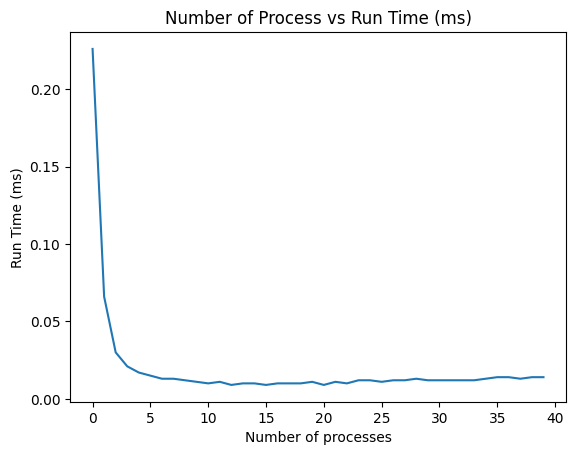

In [124]:
maxProcesses = 40
times = []

# Log time for case with no multiprocessing
begin = timeit.default_timer()
res = chunkMax(df)
end = timeit.default_timer()

times.append(round((end - begin), 3))

# For each number of processes, run the find max program with multiprocessing, log the time to do so
for i in range(1, maxProcesses):

    begin = timeit.default_timer()

    chunks = splitdf(df, i)
    pool = Pool(i)
    chunkMaxes = []
    for result in pool.imap_unordered(chunkMax, chunks):
        chunkMaxes.append(result)
    
    end = timeit.default_timer()

    times.append(round((end - begin), 3))

print(times)
processNums = list(range(0, maxProcesses))

plt.plot(processNums, times)
plt.xlabel('Number of processes')#, fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel('Run Time (ms)')
plt.title("Number of Process vs Run Time (ms)")

The graph bottoms out at about 12 processes. Although I only have 6 cores on my computer, I do have 12 proccesors